# Lab 4- Object Oriented Programming

For all of the exercises below, make sure you provide tests of your solutions.


1. Write a "counter" class that can be incremented up to a specified maximum value, will print an error if an attempt is made to increment beyond that value, and allows reseting the counter. 

In [28]:
class Counter:
    def __init__(self, max_value):
        self.max_value = max_value
        self.value = 0

    def increment(self):
        if self.value < self.max_value:
            self.value += 1
        else:
            print("Error: Counter has reached its maximum value.")

    def reset(self):
        self.value = 0

    def __str__(self):
        return f"Counter value: {self.value}"

counter = Counter(5)
print(counter)  # Counter value: 0

for _ in range(7):
    counter.increment()
    print(counter)

Counter value: 0
Counter value: 1
Counter value: 2
Counter value: 3
Counter value: 4
Counter value: 5
Error: Counter has reached its maximum value.
Counter value: 5
Error: Counter has reached its maximum value.
Counter value: 5


2. Copy and paste your solution to question 1 and modify it so that all the data held by the counter is private. Implement functions to check the value of the counter, check the maximum value, and check if the counter is at the maximum.

In [29]:
class Counter:
    def __init__(self, max_value):
        self.__max_value = max_value  # Private attribute for max value
        self.__value = 0  # Private attribute for current value

    def increment(self):
        if self.__value < self.__max_value:
            self.__value += 1
        else:
            print("Error: Counter has reached its maximum value.")

    def reset(self):
        self.__value = 0

    # Method to check the current value of the counter
    def get_value(self):
        return self.__value

    # Method to check the maximum value of the counter
    def get_max_value(self):
        return self.__max_value

    # Method to check if the counter is at its maximum value
    def is_at_max(self):
        return self.__value == self.__max_value

    def __str__(self):
        return f"Counter value: {self.__value}"

# Example usage:
counter = Counter(5)
print(counter)  # Counter value: 0

counter.increment()
print(counter.get_value())  # 1

counter.increment()
print(counter.get_value())  # 2

counter.reset()
print(counter.get_value())  # 0

# Try incrementing beyond the maximum value
for _ in range(7):
    counter.increment()
    print(counter)

print("Max value:", counter.get_max_value())  # 5
print("Is at max?", counter.is_at_max())  # True or False based on current value


Counter value: 0
1
2
0
Counter value: 1
Counter value: 2
Counter value: 3
Counter value: 4
Counter value: 5
Error: Counter has reached its maximum value.
Counter value: 5
Error: Counter has reached its maximum value.
Counter value: 5
Max value: 5
Is at max? True


3. Implement a class to represent a rectangle, holding the length, width, and $x$ and $y$ coordinates of a corner of the object. Implement functions that compute the area and perimeter of the rectangle. Make all data members private and privide accessors to retrieve values of data members. 

In [30]:
class Rectangle:
    def __init__(self, length, width, x, y):
        # Private attributes for dimensions and coordinates
        self.__length = length
        self.__width = width
        self.__x = x  # x-coordinate of one corner
        self.__y = y  # y-coordinate of one corner

    # Method to compute the area of the rectangle
    def area(self):
        return self.__length * self.__width

    # Method to compute the perimeter of the rectangle
    def perimeter(self):
        return 2 * (self.__length + self.__width)

    # Accessor methods to retrieve private data members
    def get_length(self):
        return self.__length

    def get_width(self):
        return self.__width

    def get_x(self):
        return self.__x

    def get_y(self):
        return self.__y

    # Method to get the corner coordinates
    def get_corner(self):
        return (self.__x, self.__y)


rect = Rectangle(10, 5, 0, 0)
print(rect)  # Rectangle(length=10, width=5, corner=(0, 0))

print("Area:", rect.area())  # Area: 50
print("Perimeter:", rect.perimeter())  # Perimeter: 30

print("Length:", rect.get_length())  # Length: 10
print("Width:", rect.get_width())  # Width: 5
print("Corner coordinates:", rect.get_corner())  # Corner coordinates: (0, 0)

Area: 50
Perimeter: 30
Length: 10
Width: 5
Corner coordinates: (0, 0)


4. Implement a class to represent a circle, holding the radius and $x$ and $y$ coordinates of center of the object. Implement functions that compute the area and perimeter of the rectangle. Make all data members private and privide accessors to retrieve values of data members. 

In [31]:
import math

class Circle:
    def __init__(self, radius, x, y):
        # Private attributes for radius and center coordinates
        self.__radius = radius
        self.__x = x 
        self.__y = y  

    # Method to compute the area of the circle
    def area(self):
        return math.pi * (self.__radius ** 2)

    # Method to compute the perimeter (circumference) of the circle
    def perimeter(self):
        return 2 * math.pi * self.__radius

    # Accessor methods to retrieve private data members
    def get_radius(self):
        return self.__radius

    def get_x(self):
        return self.__x

    def get_y(self):
        return self.__y

    # Method to get the center coordinates
    def get_center(self):
        return (self.__x, self.__y)

circle = Circle(5, 0, 0)

print("Area:", circle.area())  # Area: 78.53981633974483
print("Perimeter:", circle.perimeter())  # Perimeter: 31.41592653589793
print("Radius:", circle.get_radius())  # Radius: 5
print("Center coordinates:", circle.get_center())  # Center coordinates: (0, 0)


Area: 78.53981633974483
Perimeter: 31.41592653589793
Radius: 5
Center coordinates: (0, 0)


5. Implement a common base class for the classes implemented in 3 and 4 above which implements all common methods as not implemented functions (virtual). Re-implement your regtangle and circule classes to inherit from the base class and overload the functions accordingly. 

In [32]:
from abc import ABC, abstractmethod
import math

class Shape(ABC):
    def __init__(self, x, y):
        self._x = x  
        self._y = y

    @abstractmethod
    def area(self):
        """Compute the area of the shape"""
        pass

    @abstractmethod
    def perimeter(self):
        """Compute the perimeter of the shape"""
        pass

    def get_x(self):
        return self._x

    def get_y(self):
        return self._y

    def get_position(self):
        return (self._x, self._y)

    def __str__(self):
        return f"Shape at position ({self._x}, {self._y})"

class Rectangle(Shape):
    def __init__(self, length, width, x, y):
        super().__init__(x, y)  # Initialize the base class
        self.__length = length
        self.__width = width

    # Overriding the area method
    def area(self):
        return self.__length * self.__width

    # Overriding the perimeter method
    def perimeter(self):
        return 2 * (self.__length + self.__width)

    def get_length(self):
        return self.__length

    def get_width(self):
        return self.__width

    def __str__(self):
        return (f"Rectangle(length={self.__length}, width={self.__width}, "
                f"corner=({self.get_x()}, {self.get_y()}))")

# Circle class that inherits from Shape
class Circle(Shape):
    def __init__(self, radius, x, y):
        super().__init__(x, y)  # Initialize the base class
        self.__radius = radius

    # Overriding the area method
    def area(self):
        return math.pi * (self.__radius ** 2)

    # Overriding the perimeter method
    def perimeter(self):
        return 2 * math.pi * self.__radius

    def get_radius(self):
        return self.__radius

    def __str__(self):
        return (f"Circle(radius={self.__radius}, center=({self.get_x()}, {self.get_y()}))")

# Create a rectangle and a circle
rect = Rectangle(10, 5, 0, 0)
circle = Circle(5, 1, 1)

print(rect)  # Rectangle(length=10, width=5, corner=(0, 0))
print("Rectangle Area:", rect.area())  # Expected: 50
print("Rectangle Perimeter:", rect.perimeter())  # Expected: 30

print(circle)  # Circle(radius=5, center=(1, 1))
print("Circle Area:", circle.area())  # Expected: 78.54 (approximately)
print("Circle Perimeter:", circle.perimeter())  # Expected: 31.42 (approximately)


Rectangle(length=10, width=5, corner=(0, 0))
Rectangle Area: 50
Rectangle Perimeter: 30
Circle(radius=5, center=(1, 1))
Circle Area: 78.53981633974483
Circle Perimeter: 31.41592653589793


6. Implement a triangle class analogous to the rectangle and circle in question 5.

In [33]:
class Triangle(Shape):
    def __init__(self, side_a, side_b, side_c, x, y):
        super().__init__(x, y)  # Initialize the base class
        self.__side_a = side_a
        self.__side_b = side_b
        self.__side_c = side_c

    def area(self):
        s = self.perimeter() / 2  # Semi-perimeter
        return (s * (s - self.__side_a) * (s - self.__side_b) * (s - self.__side_c)) ** 0.5

    def perimeter(self):
        return self.__side_a + self.__side_b + self.__side_c

    def get_sides(self):
        return (self.__side_a, self.__side_b, self.__side_c)

    def __str__(self):
        return (f"Triangle(sides=({self.__side_a}, {self.__side_b}, {self.__side_c}), "
                f"vertex=({self.get_x()}, {self.get_y()}))")

7. Add a function to the object classes, including the base, that returns a list of up to 16 pairs of  $x$ and $y$ points on the parameter of the object. 

In [34]:
import math

class GeometricObject:
    def get_points(self, num_points=16):
        raise NotImplementedError("This method should be implemented by subclasses.")

class Circle(GeometricObject):
    def __init__(self, radius):
        self.radius = radius

    def get_points(self, num_points=16):
        points = []
        for i in range(num_points):
            angle = (2 * math.pi / num_points) * i
            x = self.radius * math.cos(angle)
            y = self.radius * math.sin(angle)
            points.append((x, y))
        return points

class Square(GeometricObject):
    def __init__(self, side_length):
        self.side_length = side_length

    def get_points(self, num_points=16):
        points = []
        # Calculate points on the perimeter of the square
        for i in range(num_points):
            # Determine which side the point is on
            side = i // (num_points // 4)
            position = (i % (num_points // 4)) / (num_points // 4)  # Normalized position on the side
            if side == 0:  # Bottom side
                x = position * self.side_length
                y = 0
            elif side == 1:  # Right side
                x = self.side_length
                y = position * self.side_length
            elif side == 2:  # Top side
                x = self.side_length * (1 - position)
                y = self.side_length
            else:  # Left side
                x = 0
                y = self.side_length * (1 - position)
            points.append((x, y))
        return points

# Example usage
circle = Circle(radius=5)
print("Circle points:", circle.get_points())

square = Square(side_length=5)
print("Square points:", square.get_points())

Circle points: [(5.0, 0.0), (4.619397662556434, 1.913417161825449), (3.5355339059327378, 3.5355339059327373), (1.9134171618254492, 4.619397662556434), (3.061616997868383e-16, 5.0), (-1.9134171618254485, 4.619397662556434), (-3.5355339059327373, 3.5355339059327378), (-4.619397662556434, 1.9134171618254494), (-5.0, 6.123233995736766e-16), (-4.619397662556434, -1.9134171618254483), (-3.5355339059327386, -3.5355339059327373), (-1.9134171618254516, -4.619397662556432), (-9.184850993605148e-16, -5.0), (1.91341716182545, -4.619397662556433), (3.535533905932737, -3.5355339059327386), (4.619397662556432, -1.913417161825452)]
Square points: [(0.0, 0), (1.25, 0), (2.5, 0), (3.75, 0), (5, 0.0), (5, 1.25), (5, 2.5), (5, 3.75), (5.0, 5), (3.75, 5), (2.5, 5), (1.25, 5), (0, 5.0), (0, 3.75), (0, 2.5), (0, 1.25)]


8. Add a function to the object classes, including the base, that tests if a given set of $x$ and $y$ coordinates are inside of the object. You'll have to think through how to determine if a set of coordinates are inside an object for each object type.

In [35]:
import math

class GeometricObject:
    def get_points(self, num_points=16):
        raise NotImplementedError("This method should be implemented by subclasses.")

    def contains(self, x, y):
        raise NotImplementedError("This method should be implemented by subclasses.")


class Circle(GeometricObject):
    def __init__(self, radius):
        self.radius = radius

    def get_points(self, num_points=16):
        points = []
        for i in range(num_points):
            angle = (2 * math.pi / num_points) * i
            x = self.radius * math.cos(angle)
            y = self.radius * math.sin(angle)
            points.append((x, y))
        return points

    def contains(self, x, y):
        # Check if the point is within the circle
        return x**2 + y**2 <= self.radius**2


class Square(GeometricObject):
    def __init__(self, side_length):
        self.side_length = side_length

    def get_points(self, num_points=16):
        points = []
        # Calculate points on the perimeter of the square
        for i in range(num_points):
            # Determine which side the point is on
            side = i // (num_points // 4)
            position = (i % (num_points // 4)) / (num_points // 4)  # Normalized position on the side
            if side == 0:  # Bottom side
                x = position * self.side_length
                y = 0
            elif side == 1:  # Right side
                x = self.side_length
                y = position * self.side_length
            elif side == 2:  # Top side
                x = self.side_length * (1 - position)
                y = self.side_length
            else:  # Left side
                x = 0
                y = self.side_length * (1 - position)
            points.append((x, y))
        return points

    def contains(self, x, y):
        # Check if the point is within the square
        return 0 <= x <= self.side_length and 0 <= y <= self.side_length


circle = Circle(radius=5)
print("Circle points:", circle.get_points())
print("Is (3, 4) inside circle?", circle.contains(3, 4))
print("Is (6, 0) inside circle?", circle.contains(6, 0))

square = Square(side_length=5)
print("Square points:", square.get_points())
print("Is (3, 4) inside square?", square.contains(3, 4))
print("Is (6, 0) inside square?", square.contains(6, 0))

Circle points: [(5.0, 0.0), (4.619397662556434, 1.913417161825449), (3.5355339059327378, 3.5355339059327373), (1.9134171618254492, 4.619397662556434), (3.061616997868383e-16, 5.0), (-1.9134171618254485, 4.619397662556434), (-3.5355339059327373, 3.5355339059327378), (-4.619397662556434, 1.9134171618254494), (-5.0, 6.123233995736766e-16), (-4.619397662556434, -1.9134171618254483), (-3.5355339059327386, -3.5355339059327373), (-1.9134171618254516, -4.619397662556432), (-9.184850993605148e-16, -5.0), (1.91341716182545, -4.619397662556433), (3.535533905932737, -3.5355339059327386), (4.619397662556432, -1.913417161825452)]
Is (3, 4) inside circle? True
Is (6, 0) inside circle? False
Square points: [(0.0, 0), (1.25, 0), (2.5, 0), (3.75, 0), (5, 0.0), (5, 1.25), (5, 2.5), (5, 3.75), (5.0, 5), (3.75, 5), (2.5, 5), (1.25, 5), (0, 5.0), (0, 3.75), (0, 2.5), (0, 1.25)]
Is (3, 4) inside square? True
Is (6, 0) inside square? False


9. Add a function in the base class of the object classes that returns true/false testing that the object overlaps with another object.

In [36]:
import math

class GeometricObject:
    def get_points(self, num_points=16):
        raise NotImplementedError("This method should be implemented by subclasses.")

    def contains(self, x, y):
        raise NotImplementedError("This method should be implemented by subclasses.")
    
    def overlaps(self, other):
        raise NotImplementedError("This method should be implemented by subclasses.")


class Circle(GeometricObject):
    def __init__(self, radius, center_x=0, center_y=0):
        self.radius = radius
        self.center_x = center_x
        self.center_y = center_y

    def get_points(self, num_points=16):
        points = []
        for i in range(num_points):
            angle = (2 * math.pi / num_points) * i
            x = self.center_x + self.radius * math.cos(angle)
            y = self.center_y + self.radius * math.sin(angle)
            points.append((x, y))
        return points

    def contains(self, x, y):
        # Check if the point is within the circle
        return (x - self.center_x) ** 2 + (y - self.center_y) ** 2 <= self.radius ** 2

    def overlaps(self, other):
        if isinstance(other, Circle):
            # Check if the distance between centers is less than the sum of radii
            distance = math.sqrt((self.center_x - other.center_x) ** 2 + (self.center_y - other.center_y) ** 2)
            return distance <= (self.radius + other.radius)
        elif isinstance(other, Square):
            # Check if any corner of the square is inside the circle
            for corner in [(0, 0), (self.radius, 0), (0, self.radius), (self.radius, self.radius)]:
                if other.contains(corner[0] + self.center_x, corner[1] + self.center_y):
                    return True
            # Check if any corner of the circle is inside the square
            for angle in range(0, 360, 90):  # Check circle's corners
                rad = math.radians(angle)
                corner_x = self.center_x + self.radius * math.cos(rad)
                corner_y = self.center_y + self.radius * math.sin(rad)
                if other.contains(corner_x, corner_y):
                    return True
            return False


class Square(GeometricObject):
    def __init__(self, side_length, bottom_left_x=0, bottom_left_y=0):
        self.side_length = side_length
        self.bottom_left_x = bottom_left_x
        self.bottom_left_y = bottom_left_y

    def get_points(self, num_points=16):
        points = []
        # Calculate points on the perimeter of the square
        for i in range(num_points):
            side = i // (num_points // 4)
            position = (i % (num_points // 4)) / (num_points // 4)
            if side == 0:  # Bottom side
                x = self.bottom_left_x + position * self.side_length
                y = self.bottom_left_y
            elif side == 1:  # Right side
                x = self.bottom_left_x + self.side_length
                y = self.bottom_left_y + position * self.side_length
            elif side == 2:  # Top side
                x = self.bottom_left_x + self.side_length * (1 - position)
                y = self.bottom_left_y + self.side_length
            else:  # Left side
                x = self.bottom_left_x
                y = self.bottom_left_y + self.side_length * (1 - position)
            points.append((x, y))
        return points

    def contains(self, x, y):
        # Check if the point is within the square
        return (self.bottom_left_x <= x <= self.bottom_left_x + self.side_length and
                self.bottom_left_y <= y <= self.bottom_left_y + self.side_length)

    def overlaps(self, other):
        if isinstance(other, Square):
            # Check if one square is to the left, right, above, or below the other
            return not (self.bottom_left_x + self.side_length < other.bottom_left_x or
                        self.bottom_left_x > other.bottom_left_x + other.side_length or
                        self.bottom_left_y + self.side_length < other.bottom_left_y or
                        self.bottom_left_y > other.bottom_left_y + other.side_length)
        elif isinstance(other, Circle):
            # Use the circle's overlaps method
            return other.overlaps(self)




10. Copy the `Canvas` class from lecture to in a python file creating a `paint` module. Copy your classes from above into the module and implement paint functions. Implement a `CompoundShape` class. Create a simple drawing demonstrating that all of your classes are working.

11. Create a `RasterDrawing` class. Demonstrate that you can create a drawing made of several shapes, paint the drawing, modify the drawing, and paint it again. 

Initial Drawing:


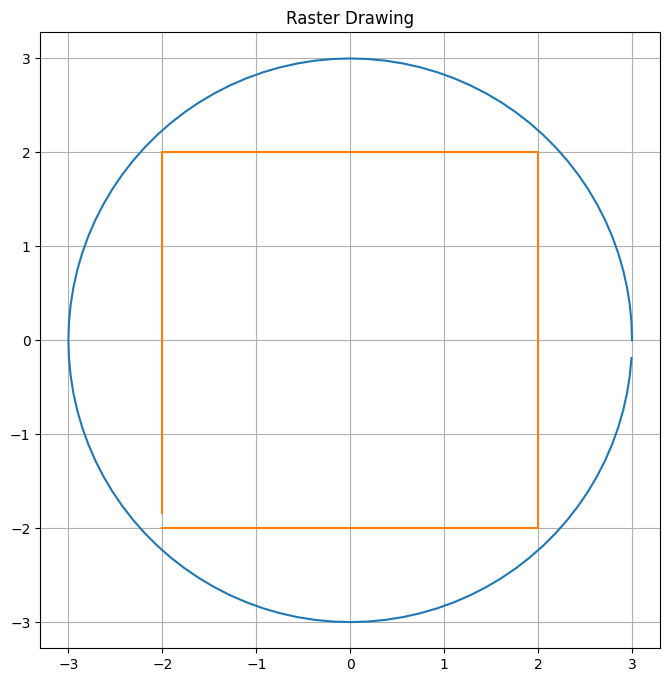

Modified Drawing:


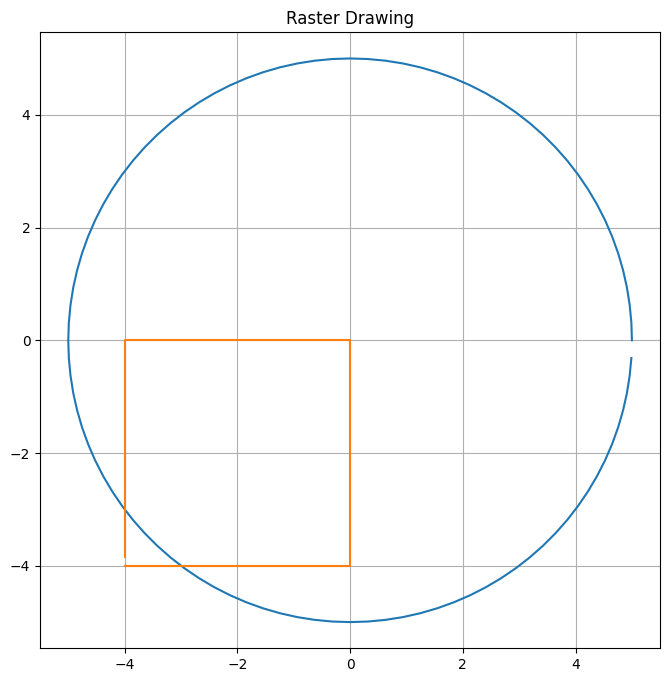

In [37]:
import math
import matplotlib.pyplot as plt

class GeometricObject:
    def get_points(self, num_points=16):
        raise NotImplementedError("This method should be implemented by subclasses.")

    def contains(self, x, y):
        raise NotImplementedError("This method should be implemented by subclasses.")
    
    def overlaps(self, other):
        raise NotImplementedError("This method should be implemented by subclasses.")


class Circle(GeometricObject):
    def __init__(self, radius, center_x=0, center_y=0):
        self.radius = radius
        self.center_x = center_x
        self.center_y = center_y

    def get_points(self, num_points=16):
        points = []
        for i in range(num_points):
            angle = (2 * math.pi / num_points) * i
            x = self.center_x + self.radius * math.cos(angle)
            y = self.center_y + self.radius * math.sin(angle)
            points.append((x, y))
        return points

    def contains(self, x, y):
        return (x - self.center_x) ** 2 + (y - self.center_y) ** 2 <= self.radius ** 2

    def overlaps(self, other):
        if isinstance(other, Circle):
            distance = math.sqrt((self.center_x - other.center_x) ** 2 + (self.center_y - other.center_y) ** 2)
            return distance <= (self.radius + other.radius)
        return False


class Square(GeometricObject):
    def __init__(self, side_length, bottom_left_x=0, bottom_left_y=0):
        self.side_length = side_length
        self.bottom_left_x = bottom_left_x
        self.bottom_left_y = bottom_left_y

    def get_points(self, num_points=16):
        points = []
        for i in range(num_points):
            side = i // (num_points // 4)
            position = (i % (num_points // 4)) / (num_points // 4)
            if side == 0:  # Bottom side
                x = self.bottom_left_x + position * self.side_length
                y = self.bottom_left_y
            elif side == 1:  # Right side
                x = self.bottom_left_x + self.side_length
                y = self.bottom_left_y + position * self.side_length
            elif side == 2:  # Top side
                x = self.bottom_left_x + self.side_length * (1 - position)
                y = self.bottom_left_y + self.side_length
            else:  # Left side
                x = self.bottom_left_x
                y = self.bottom_left_y + self.side_length * (1 - position)
            points.append((x, y))
        return points

    def contains(self, x, y):
        return (self.bottom_left_x <= x <= self.bottom_left_x + self.side_length and
                self.bottom_left_y <= y <= self.bottom_left_y + self.side_length)

    def overlaps(self, other):
        if isinstance(other, Square):
            return not (self.bottom_left_x + self.side_length < other.bottom_left_x or
                        self.bottom_left_x > other.bottom_left_x + other.side_length or
                        self.bottom_left_y + self.side_length < other.bottom_left_y or
                        self.bottom_left_y > other.bottom_left_y + other.side_length)
        return False


class RasterDrawing:
    def __init__(self):
        self.shapes = []

    def add_shape(self, shape):
        if isinstance(shape, GeometricObject):
            self.shapes.append(shape)

    def paint(self):
        plt.figure(figsize=(8, 8))
        for shape in self.shapes:
            points = shape.get_points(num_points=100)
            xs, ys = zip(*points)
            plt.plot(xs, ys)  # Draw the shape
        plt.axis('equal')
        plt.grid()
        plt.title("Raster Drawing")
        plt.show()

    def modify_shape(self, index, **kwargs):
        if 0 <= index < len(self.shapes):
            shape = self.shapes[index]
            if isinstance(shape, Circle):
                if 'radius' in kwargs:
                    shape.radius = kwargs['radius']
                if 'center_x' in kwargs:
                    shape.center_x = kwargs['center_x']
                if 'center_y' in kwargs:
                    shape.center_y = kwargs['center_y']
            elif isinstance(shape, Square):
                if 'side_length' in kwargs:
                    shape.side_length = kwargs['side_length']
                if 'bottom_left_x' in kwargs:
                    shape.bottom_left_x = kwargs['bottom_left_x']
                if 'bottom_left_y' in kwargs:
                    shape.bottom_left_y = kwargs['bottom_left_y']

# Demonstrating the RasterDrawing class
drawing = RasterDrawing()

# Create shapes and add to the drawing
circle1 = Circle(radius=3, center_x=0, center_y=0)
square1 = Square(side_length=4, bottom_left_x=-2, bottom_left_y=-2)
drawing.add_shape(circle1)
drawing.add_shape(square1)

# Paint the initial drawing
print("Initial Drawing:")
drawing.paint()

# Modify the circle's radius and square's position
drawing.modify_shape(0, radius=5)  # Modify circle1
drawing.modify_shape(1, bottom_left_x=-4, bottom_left_y=-4)  # Move square1

# Paint the modified drawing
print("Modified Drawing:")
drawing.paint()


12. Implement the ability to load/save raster drawings and demonstate that your method works. One way to implement this ability:

   * Overload `__repr__` functions of all objects to return strings of the python code that would construct the object.
   
   * In the save method of raster drawing class, store the representations into the file.
   * Write a loader function that reads the file and uses `eval` to instantiate the object.

For example:

In [38]:
class foo:
    def __init__(self,a,b=None):
        self.a=a
        self.b=b
        
    def __repr__(self):
        return "foo("+repr(self.a)+","+repr(self.b)+")"
    
    def save(self,filename):
        f=open(filename,"w")
        f.write(self.__repr__())
        f.close()
        
   
def foo_loader(filename):
    f=open(filename,"r")
    tmp=eval(f.read())
    f.close()
    return tmp


In [39]:
# Test
print(repr(foo(1,"hello")))

foo(1,'hello')


In [40]:
# Create an object and save it
ff=foo(1,"hello")
ff.save("Test.foo")

In [41]:
# Check contents of the saved file
!cat Test.foo

foo(1,'hello')

In [42]:
# Load the object
ff_reloaded=foo_loader("Test.foo")
ff_reloaded

foo(1,'hello')

In [44]:
import matplotlib.pyplot as plt

class GeometricObject:
    # Assuming there's a base class named GeometricObject, which Square and Circle inherit from
    pass

class Square(GeometricObject):
    def __init__(self, side_length, bottom_left_x, bottom_left_y):
        self.side_length = side_length
        self.bottom_left_x = bottom_left_x
        self.bottom_left_y = bottom_left_y

    def get_points(self, num_points):
        points = []
        for i in range(num_points):
            side = i // (num_points // 4)
            position = (i % (num_points // 4)) / (num_points // 4)
            if side == 0:  # Bottom side
                x = self.bottom_left_x + position * self.side_length
                y = self.bottom_left_y
            elif side == 1:  # Right side
                x = self.bottom_left_x + self.side_length
                y = self.bottom_left_y + position * self.side_length
            elif side == 2:  # Top side
                x = self.bottom_left_x + self.side_length * (1 - position)
                y = self.bottom_left_y + self.side_length
            else:  # Left side
                x = self.bottom_left_x
                y = self.bottom_left_y + self.side_length * (1 - position)
            points.append((x, y))
        return points

    def contains(self, x, y):
        return (self.bottom_left_x <= x <= self.bottom_left_x + self.side_length and
                self.bottom_left_y <= y <= self.bottom_left_y + self.side_length)

    def overlaps(self, other):
        if isinstance(other, Square):
            return not (self.bottom_left_x + self.side_length < other.bottom_left_x or
                        self.bottom_left_x > other.bottom_left_x + other.side_length or
                        self.bottom_left_y + self.side_length < other.bottom_left_y or
                        self.bottom_left_y > other.bottom_left_y + other.side_length)
        return False

    def __repr__(self):
        return (f"Square(side_length={self.side_length}, bottom_left_x={self.bottom_left_x}, "
                f"bottom_left_y={self.bottom_left_y})")

class RasterDrawing:
    def __init__(self):
        self.shapes = []

    def add_shape(self, shape):
        if isinstance(shape, GeometricObject):
            self.shapes.append(shape)

    def paint(self):
        plt.figure(figsize=(8, 8))
        for shape in self.shapes:
            points = shape.get_points(num_points=100)
            xs, ys = zip(*points)
            plt.plot(xs, ys)  # Draw the shape
        plt.axis('equal')
        plt.grid()
        plt.title("Raster Drawing")
        plt.show()

    def modify_shape(self, index, **kwargs):
        if 0 <= index < len(self.shapes):
            shape = self.shapes[index]
            if isinstance(shape, Circle):
                if 'radius' in kwargs:
                    shape.radius = kwargs['radius']
                if 'center_x' in kwargs:
                    shape.center_x = kwargs['center_x']
                if 'center_y' in kwargs:
                    shape.center_y = kwargs['center_y']
            elif isinstance(shape, Square):
                if 'side_length' in kwargs:
                    shape.side_length = kwargs['side_length']
                if 'bottom_left_x' in kwargs:
                    shape.bottom_left_x = kwargs['bottom_left_x']
                if 'bottom_left_y' in kwargs:
                    shape.bottom_left_y = kwargs['bottom_left_y']

    def save(self, filename):
        with open(filename, 'w') as file:
            for shape in self.shapes:
                file.write(repr(shape) + '\n')

    @classmethod
    def load(cls, filename):
        drawing = cls()
        with open(filename, 'r') as file:
            for line in file:
                shape = eval(line.strip())  # Create object from string representation
                drawing.add_shape(shape)
        return drawing
